In [1]:
import os
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%run "..//src//vgp_helper_fx_spectral"



In [2]:
ROOT_FOLDER = "D:\\VGP"

DATA_FOLDER = os.path.join(ROOT_FOLDER, "2P\\proc_s2p\\")
BEHAV_FOLDER = os.path.join(ROOT_FOLDER, "Bonsai\\")
METAFILE = os.path.join(ROOT_FOLDER, "Metafile_VGP2.4.xls")
rows, header = tp.metafilereader(METAFILE, sheetname="Analysis_Cas+malt")


File is excel file. Making csv metafile first


In [3]:
# Goes through metafile assembling data from s2p files where possible

cell_data={}

for row in rows:
    try:
        key=row[0]+'_'+row[3]
        animal=row[0]
        day=row[2]
        date=int(row[1])
        events=row[6]
#         solution=row[3]
        
        s2p_folder = os.path.join(DATA_FOLDER,
                                  "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                                  .format(animal, day, date))
        events_file =BEHAV_FOLDER+events
        
        
        cell_data[key] = assemble_data(s2p_folder,events_file)
        cell_data[key]['animal'] = row[0]
        cell_data[key]['diet'] = row[11]
        cell_data[key]['session'] = row[3]
        cell_data[key]['solution']=row[5]
        
    except FileNotFoundError:
        print('Cannot find file for', key)
     

Cannot find file for VGP306_M6
Cannot find file for VGP307_C3
Cannot find file for VGP402_C1


C:\Users\mko102\GitHub\VGP\src\vgp_helper_fx_spectral.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(snips)


In [4]:
# cell_data['VGP203_C3']['empty_lick_snips_all']

In [5]:
mice=[]

for key in cell_data.keys(): 
    d=cell_data[key]
    mouseid=d['animal']
    if mouseid not in mice: mice.append(mouseid)

In [6]:
test= np.mean(cell_data['VGP118_C1']['lick_snips_all'][np.where(cell_data['VGP118_C1']['lick_responsive']==1)],axis=1)

### making heatmap of all cells 

In [7]:
from itertools import chain

snips_PR_cas=[]
act_PR_cas=[]
in_PR_cas=[]
empty_PR_cas=[]

snips_PR_malt=[]
act_PR_malt=[]
in_PR_malt=[]
empty_PR_malt=[]


snips_NR_cas=[]
act_NR_cas=[]
in_NR_cas=[]

snips_NR_malt=[]
act_NR_malt=[]
in_NR_malt=[]

animal=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all'][np.where(d['lick_responsive']==1)]
        animal.append(d['animal'])

        for cell in snips:
            snips_PR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_cas.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PR_cas.append(np.mean(cell, axis=0))
            
    elif d['diet']=='PR' and d['session']=='M3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all']

        for cell in snips:
            snips_PR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_malt.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PR_malt.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='C3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_cas.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='M3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_malt.append(np.mean(cell, axis=0))

            
#Filtering out nan values. need to figure out why there's one cell with nan values... 
empty_PR_malt_f=[]        
for cell in empty_PR_malt: 
    if not np.isnan(cell).any(): 
        empty_PR_malt_f.append(cell)
        
        



C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
from operator import itemgetter

def sort_by_activity(arrays, start_index, end_index):
    subset_mean_sorted = sorted(((np.mean(arr[start_index:end_index]), arr) for arr in arrays), key=itemgetter(0), reverse=True)
    sorted_arrays = [arr for _, arr in subset_mean_sorted]
    return sorted_arrays

In [9]:
#sorting by activity - PR cas activated
PR_act_cas=sort_by_activity(act_PR_cas,50,70)
PR_in_cas=sort_by_activity(in_PR_cas,50,70)
PR_cas_empty=sort_by_activity(empty_PR_cas,50,70)


NR_act_cas=sort_by_activity(act_NR_cas,50,70)
NR_in_cas=sort_by_activity(in_NR_cas,50,70)




PR_act_malt=sort_by_activity(act_PR_malt,50,70)
PR_in_malt=sort_by_activity(in_PR_malt,50,70)


NR_act_malt=sort_by_activity(act_NR_malt,50,70)
NR_in_malt=sort_by_activity(in_NR_malt,50,70)


## Heatmaps all cells NR and PR

281


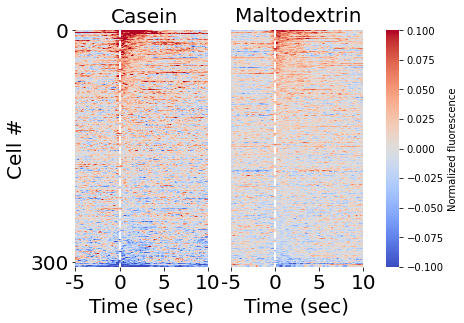

In [10]:
f, ax = plt.subplots(figsize=(6,4.5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.25,hspace=0.2, bottom=0.15, left=0.1, right=0.85)

cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NR_cas,50,70)

y2 = sort_by_activity(snips_NR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )


ax[0].text(40,-10, "Casein", fontsize=20)
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=2)

ax[1].text(5,-10, "Maltodextrin", size=20)
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=2)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=20)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=20)

ax[0].set_ylabel("Cell #", size=20)

print(len(y2))
ax[0].set_yticks([0,300])
ax[0].set_yticklabels([0,300], size=20)
ax[1].set_yticks([])


# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\Presentations\\NordicNeuroscience 2024\\Figs\\heatmap_NR1.pdf')

273


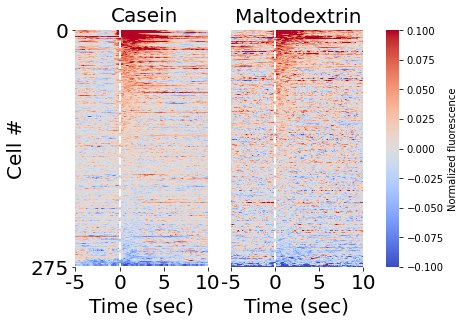

In [14]:
f, ax = plt.subplots(figsize=(6,4.5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.25,hspace=0.2, bottom=0.15, left=0.1, right=0.85)

cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_PR_cas,50,70)

y2 = sort_by_activity(snips_PR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )


ax[0].text(40,-10, "Casein", fontsize=20)
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=2)

ax[1].text(5,-10, "Maltodextrin", size=20)
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=2)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=20)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=20)

ax[0].set_ylabel("Cell #", size=20)

print(len(y1))
ax[0].set_yticks([0,275])
ax[0].set_yticklabels([0,275], size=20)
ax[1].set_yticks([])

# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\Presentations\\NordicNeuroscience 2024\\heatmap_PR1.pdf')

## Signal fig NR and PR 

<ipython-input-16-c6be25baa6a1>:42: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axis.set_xlabel("Time from lick (s)", Size=20)


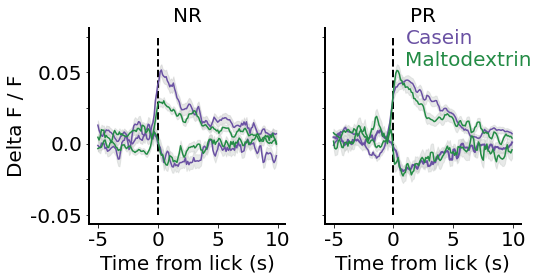

In [16]:
f, ax = plt.subplots(figsize=(8,4),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.2, left=0.2, right=0.95)


# snips_NR_carb=[]
# act_NR_carb=[]
# in_NR_carb=[]

tp.shadedError(ax[0], act_NR_cas, 
               linecolor="#6a51a3",
              linewidth=1.5,
              errorcolor='silver')

tp.shadedError(ax[0], in_NR_cas, linecolor="#6a51a3",linewidth=1.5,)

tp.shadedError(ax[0], act_NR_malt, linecolor="#238b45",linewidth=1.5,)
tp.shadedError(ax[0], in_NR_malt, linecolor="#238b45",linewidth=1.5,)


tp.shadedError(ax[1], act_PR_cas, linecolor="#6a51a3",linewidth=1.5,)
tp.shadedError(ax[1], in_PR_cas, linecolor="#6a51a3",linewidth=2,)


tp.shadedError(ax[1], act_PR_malt, linecolor="#238b45",linewidth=1.5,)
tp.shadedError(ax[1], in_PR_malt, linecolor="#238b45",linewidth=1.5,)




ax[1].text(60, 0.070, "Casein",color='#6a51a3', size=20)
ax[1].text(60, 0.055, "Maltodextrin", color="#238b45", size=20)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=20)
    axis.set_yticks([-0.05,-0.025, 0.0, 0.025,0.05,0.075])
    axis.set_yticklabels(['-0.05','', '0.0', '','0.05',''], size=20)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.075, color="black", linestyle="--", linewidth=2)
    axis.set_xlabel("Time from lick (s)", Size=20)
    axis.spines['bottom'].set_linewidth(2)
    axis.spines['left'].set_linewidth(2)


ax[0].set_ylabel("Delta F / F", size=20)
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('NR', size=20)
ax[1].set_title('PR', size=20)


f.savefig('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\Presentations\\NordicNeuroscience 2024\\Figs\\signal_cond1.pdf')

## Pie Charts

In [23]:
cols = ["data", "cas", "malt"]
df_resp_PR = pd.DataFrame(columns=cols)
df_resp_PR['cas']=len(act_PR_cas),len(in_PR_cas),len(snips_PR_cas)-(len(act_PR_cas)+len(in_PR_cas))
df_resp_PR['malt']=len(act_PR_malt),len(in_PR_malt),len(snips_PR_malt)-(len(act_PR_malt)+len(in_PR_malt))

df_resp_PR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_PR['cas_pct'] = df_resp_PR['cas'] / df_resp_PR['cas'].sum() * 100
df_resp_PR['malt_pct'] = df_resp_PR['malt'] / df_resp_PR['malt'].sum() * 100

# # # Transpose the DataFrame
# df_resp_PR.set_index('data', inplace=True)
# df_resp_PR = df_resp_PR.T


df_resp_PR

,data,cas,malt,cas_pct,malt_pct
0,lick_activated,138,108,50.549451,34.951456
1,lick_inhibited,48,37,17.582418,11.974110
2,non-responsive,87,164,31.868132,53.074434


In [24]:
cols = ["data", "cas", 'malt']
df_resp_NR = pd.DataFrame(columns=cols)
df_resp_NR['cas']=len(act_NR_cas),len(in_NR_cas),len(snips_NR_cas)-(len(act_NR_cas)+len(in_NR_cas))
df_resp_NR['malt']=len(act_NR_malt),len(in_NR_malt),len(snips_NR_malt)-(len(act_NR_malt)+len(in_NR_malt))

df_resp_NR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_NR['cas_pct'] = df_resp_NR['cas'] / df_resp_NR['cas'].sum() * 100
df_resp_NR['malt_pct'] = df_resp_NR['malt'] / df_resp_NR['malt'].sum() * 100

# # # Transpose the DataFrame
# df_resp_NR.set_index('data', inplace=True)
# df_resp_NR = df_resp_NR.T

df_resp_NR

,data,cas,malt,cas_pct,malt_pct
0,lick_activated,84,106,27.45098,37.722420
1,lick_inhibited,46,41,15.03268,14.590747
2,non-responsive,176,134,57.51634,47.686833


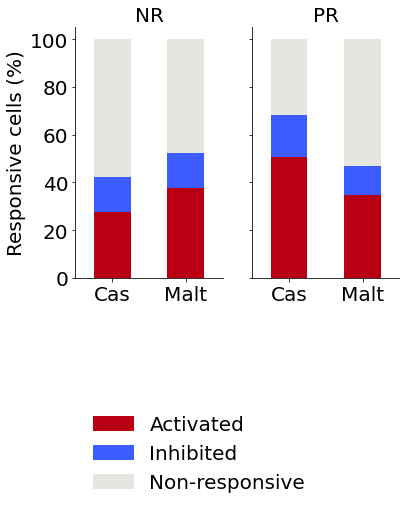

In [22]:
f, ax = plt.subplots(figsize=(6,6),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.3, left=0.2, right=0.95)
colors=['#b80012','#3d5cff','#e6e6e0']

df_resp_NR[2:4].plot(kind='bar', stacked=True, ax=ax[0], color=colors)

df_resp_PR[2:4].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

for axis in ax:
    for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
        axis.set_xticklabels(['Cas', 'Malt'], rotation=0, size=20)
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
    
    
ax[1].set_title('PR', size=20)
ax[0].set_title('NR', size=20)
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100], size=20)
ax[0].set_ylabel("Responsive cells (%)", size=20)

# ax[1].set_yticklabels([])
# ax[1].get_legend().remove()
ax[1].get_legend().remove()

colors = {'Activated':'#b80012', 'Inhibited':'#3d5cff' , 'Non-responsive': '#e6e6e0'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0.2,0.2, color=colors[label]) for label in labels]
ax[0].legend(handles, labels, frameon=False,loc='center left', bbox_to_anchor=(0, -0.7),fontsize=20)





f.savefig('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\Presentations\\NordicNeuroscience 2024\\Figs\\prop_cond1.pdf')

# NRPR and PRNR

In [25]:
from itertools import chain

snips_PRNR_cas=[]
act_PRNR_cas=[]
in_PRNR_cas=[]
empty_PRNR_cas=[]

snips_PRNR_malt=[]
act_PRNR_malt=[]
in_PRNR_malt=[]
empty_PRNR_malt=[]


snips_NRPR_cas=[]
act_NRPR_cas=[]
in_NRPR_cas=[]
empty_NRPR_cas=[]

snips_NRPR_malt=[]
act_NRPR_malt=[]
in_NRPR_malt=[]
empty_NRPR_malt=[]

animal=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PRNR' and d['session']=='C6':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all'][np.where(d['lick_responsive']==1)]
        animal.append(d['animal'])


        for cell in snips:
            snips_PRNR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PRNR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PRNR_cas.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PRNR_cas.append(np.mean(cell, axis=0))
            
            
    elif d['diet']=='PRNR' and d['session']=='M6':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all']

        for cell in snips:
            snips_PRNR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PRNR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PRNR_malt.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PRNR_malt.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NRPR' and d['session']=='C6':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NRPR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NRPR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NRPR_cas.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NRPR' and d['session']=='M6':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NRPR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NRPR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NRPR_malt.append(np.mean(cell, axis=0))

            
# #Filtering out nan values. need to figure out why there's one cell with nan values... 
# empty_PR_malt_f=[]        
# for cell in empty_PR_malt: 
#     if not np.isnan(cell).any(): 
#         empty_PR_malt_f.append(cell)
        
        



C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## heatmaps

315


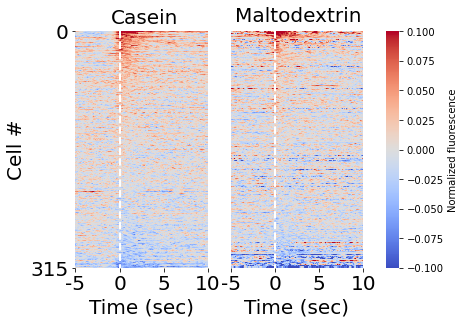

In [27]:
f, ax = plt.subplots(figsize=(6,4.5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.25,hspace=0.2, bottom=0.15, left=0.1, right=0.85)

cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NRPR_cas,50,70)

y2 = sort_by_activity(snips_NRPR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'},
           )

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )


# cbar_ax=ax[2]

# cbar_ax.set_yticklabels([-0.10, 0, 0.10], fontsize=20)
# cbar_ax.set_ylabel('Normalized fluorescence', size=20)

ax[0].text(40,-10, "Casein", fontsize=20)
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=2)

ax[1].text(5,-10, "Maltodextrin", size=20)
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=2)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=20)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=20)

ax[0].set_ylabel("Cell #", size=20)

ax[0].set_yticks([0,315])
ax[0].set_yticklabels([0,315], size=20)
ax[1].set_yticks([])


# ax[2].set_ylabel("Delta F / F", size=12)
print(len(y1))

f.savefig('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\Presentations\\NordicNeuroscience 2024\\heatmap_NR2.pdf')

283


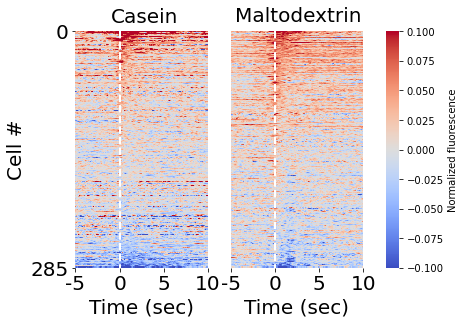

In [28]:
f, ax = plt.subplots(figsize=(6,4.5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.25,hspace=0.2, bottom=0.15, left=0.1, right=0.85)

cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_PRNR_cas,50,70)

y2 = sort_by_activity(snips_PRNR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'},
           )

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )


# cbar_ax=ax[2]

# cbar_ax.set_yticklabels([-0.10, 0, 0.10], fontsize=20)
# cbar_ax.set_ylabel('Normalized fluorescence', size=20)

ax[0].text(40,-10, "Casein", fontsize=20)
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=2)

ax[1].text(5,-10, "Maltodextrin", size=20)
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=2)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=20)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=20)

ax[0].set_ylabel("Cell #", size=20)

ax[0].set_yticks([0,283])
ax[0].set_yticklabels([0,285], size=20)
ax[1].set_yticks([])


# ax[2].set_ylabel("Delta F / F", size=12)
print(len(y1))

f.savefig('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\Presentations\\NordicNeuroscience 2024\\heatmap_PR2.pdf')

<ipython-input-30-d0ebaeae8ef0>:42: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axis.set_xlabel("Time from lick (s)", Size=20)


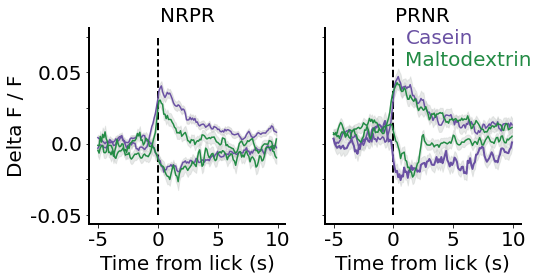

In [30]:
f, ax = plt.subplots(figsize=(8,4),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.2, left=0.2, right=0.95)


# snips_NR_carb=[]
# act_NR_carb=[]
# in_NR_carb=[]

tp.shadedError(ax[0], act_NRPR_cas, 
               linecolor="#6a51a3",
              linewidth=1.5,
              errorcolor='silver')

tp.shadedError(ax[0], in_NRPR_cas, linecolor="#6a51a3",linewidth=1.5,)

tp.shadedError(ax[0], act_NRPR_malt, linecolor="#238b45",linewidth=1.5,)
tp.shadedError(ax[0], in_NRPR_malt, linecolor="#238b45",linewidth=1.5,)


tp.shadedError(ax[1], act_PRNR_cas, linecolor="#6a51a3",linewidth=1.5,)
tp.shadedError(ax[1], in_PRNR_cas, linecolor="#6a51a3",linewidth=2,)


tp.shadedError(ax[1], act_PRNR_malt, linecolor="#238b45",linewidth=1.5,)
tp.shadedError(ax[1], in_PRNR_malt, linecolor="#238b45",linewidth=1.5,)




ax[1].text(60, 0.070, "Casein",color='#6a51a3', size=20)
ax[1].text(60, 0.055, "Maltodextrin", color="#238b45", size=20)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=20)
    axis.set_yticks([-0.05,-0.025, 0.0, 0.025,0.05,0.075])
    axis.set_yticklabels(['-0.05','', '0.0', '','0.05',''], size=20)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.075, color="black", linestyle="--", linewidth=2)
    axis.set_xlabel("Time from lick (s)", Size=20)
    axis.spines['bottom'].set_linewidth(2)
    axis.spines['left'].set_linewidth(2)


ax[0].set_ylabel("Delta F / F", size=20)
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('NRPR', size=20)
ax[1].set_title('PRNR', size=20)


f.savefig('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\Presentations\\NordicNeuroscience 2024\\Figs\\signal_cond2.pdf')

## Signal

In [31]:
cols = ["data", "cas", 'malt']
df_resp_PRNR = pd.DataFrame(columns=cols)
df_resp_PRNR['cas']=len(act_PRNR_cas),len(in_PRNR_cas),len(snips_PRNR_cas)-(len(act_PRNR_cas)+len(in_PRNR_cas))
df_resp_PRNR['malt']=len(act_PRNR_malt),len(in_PRNR_malt),len(snips_PRNR_malt)-(len(act_PRNR_malt)+len(in_PRNR_malt))

df_resp_PRNR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_PRNR['cas_pct_2'] = df_resp_PRNR['cas'] / df_resp_PRNR['cas'].sum() * 100
df_resp_PRNR['malt_pct_2'] = df_resp_PRNR['malt'] / df_resp_PRNR['malt'].sum() * 100

# # # Transpose the DataFrame
# df_resp_PRNR.set_index('data', inplace=True)
# df_resp_PRNR = df_resp_PRNR.T

df_resp_PRNR

,data,cas,malt,cas_pct_2,malt_pct_2
0,lick_activated,74,57,26.148410,23.170732
1,lick_inhibited,57,61,20.141343,24.796748
2,non-responsive,152,128,53.710247,52.032520


In [32]:
cols = ["data", "cas", 'malt']
df_resp_NRPR = pd.DataFrame(columns=cols)
df_resp_NRPR['cas']=len(act_NRPR_cas),len(in_NRPR_cas),len(snips_NRPR_cas)-(len(act_NRPR_cas)+len(in_NRPR_cas))
df_resp_NRPR['malt']=len(act_NRPR_malt),len(in_NRPR_malt),len(snips_NRPR_malt)-(len(act_NRPR_malt)+len(in_NRPR_malt))

df_resp_NRPR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_NRPR['cas_pct_2'] = df_resp_NRPR['cas'] / df_resp_NRPR['cas'].sum() * 100
df_resp_NRPR['malt_pct_2'] = df_resp_NRPR['malt'] / df_resp_NRPR['malt'].sum() * 100

# # # Transpose the DataFrame
# df_resp_NRPR.set_index('data', inplace=True)
# df_resp_NRPR= df_resp_NRPR.T

df_resp_NRPR

,data,cas,malt,cas_pct_2,malt_pct_2
0,lick_activated,89,58,28.253968,23.673469
1,lick_inhibited,76,39,24.126984,15.918367
2,non-responsive,150,148,47.619048,60.408163


In [33]:
cols = ["data", "cas", "malt"]

df_merged_PR = pd.concat([df_resp_PR, df_resp_PRNR], ignore_index=True)

# # Transpose the DataFrame
df_merged_PR.set_index('data', inplace=True)
df_merged_PR = df_merged_PR.T



In [34]:
cols = ["data", "cas", 'malt']

df_merged_NR = pd.concat([df_resp_NR, df_resp_NRPR], ignore_index=True)

# # Transpose the DataFrame
df_merged_NR.set_index('data', inplace=True)
df_merged_NR = df_merged_NR.T



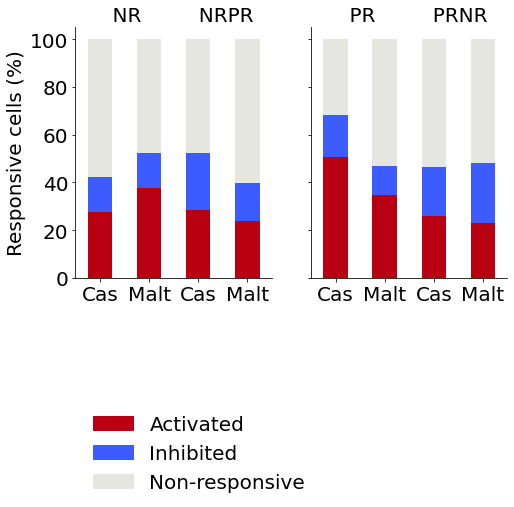

In [35]:
f, ax = plt.subplots(figsize=(8,6),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.3, left=0.2, right=0.95)
colors=['#b80012','#3d5cff','#e6e6e0']

df_merged_NR[2:6].plot(kind='bar', stacked=True, ax=ax[0], color=colors)


df_merged_PR[2:6].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

for axis in ax:
    for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
        axis.set_xticklabels(['Cas', 'Malt', 'Cas', 'Malt'], rotation=0, size=20)
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
    
    
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100], size=20)
ax[0].set_ylabel("Responsive cells (%)", size=20)

ax[1].set_title('    PR         PRNR ', size=20)
ax[0].set_title('    NR         NRPR ', size=20)

# ax[1].set_yticklabels([])
# ax[1].get_legend().remove()
ax[1].get_legend().remove()

colors = {'Activated':'#b80012', 'Inhibited':'#3d5cff' , 'Non-responsive': '#e6e6e0'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0.2,0.2, color=colors[label]) for label in labels]
ax[0].legend(handles, labels, frameon=False,loc='center left', bbox_to_anchor=(0, -0.7),fontsize=20)


f.savefig('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\Presentations\\NordicNeuroscience 2024\\prop_cond2.pdf')

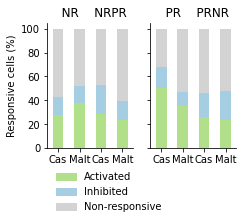

In [36]:
f, ax = plt.subplots(figsize=(3.5,3),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.3, left=0.2, right=0.95)
colors=['#b2df8a','#a6cee3','lightgrey']

df_merged_NR[2:6].plot(kind='bar', stacked=True, ax=ax[0], color=colors)


df_merged_PR[2:6].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

for axis in ax:
    for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
        axis.set_xticklabels(['Cas', 'Malt', 'Cas', 'Malt'], rotation=0)
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)

    
ax[1].set_title('   PR    PRNR ')
ax[0].set_title('   NR    NRPR ')
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100])
ax[0].set_ylabel("Responsive cells (%)")

# ax[1].set_yticklabels([])
# ax[1].get_legend().remove()
ax[1].get_legend().remove()

colors = {'Activated':'#b2df8a', 'Inhibited':'#a6cee3' , 'Non-responsive': 'Lightgrey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0.2,0.2, color=colors[label]) for label in labels]
ax[0].legend(handles, labels, frameon=False,loc='center left', bbox_to_anchor=(0, -0.35))


ax[0].spines["top"].set_visible(False)

# f.savefig("..//output//Stack_cas-malt_diet2.png")

### Proportions activated cells per animal

In [37]:
cols = ["animal", "diet", "session","solution", "lick_activated"]
df_activated = pd.DataFrame(columns=cols)

for key, d in cell_data.items():
    percent_act = d["df_responsive"].loc["lick_all", "responsive"] / np.sum(d["df_responsive"].loc['pump_only':'neither',"activated"]) * 100
    data = np.array([d["animal"], d["diet"], d["session"], d["solution"],percent_act])
    df_temp = pd.DataFrame({col: value for col, value in zip(cols, data)},
                          index=[key.split("_")[0]]).astype({'lick_activated':'float'})
    

    df_activated = pd.concat([df_activated, df_temp])


In [38]:
df_pref = (df_activated.pivot_table(index=["animal", "diet"],
                         columns=["session"],
                         values="lick_activated",
                         aggfunc="mean")
             .astype({"C3": "float", "M3": "float"})
#              .assign(pref=lambda df_: df_.cas / (df_.cas + df_.malt))
             .assign(pref1=lambda df_: df_.C3 - df_.M3)
           .assign(pref2=lambda df_: df_.C6 - df_.M6)

           
          )



In [39]:
# Making dataframe for NR-NRPR group
df_NR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="C3")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="M3")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NRPR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="C6")
#  .fillna(0)
 .assign(NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PRNR"])
 .dropna()
)

df_NRPR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="M6")
#  .fillna(0)
 .assign(NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="C3")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)

df_PR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="M3")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)


df_PRNR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="C6")
#  .fillna(0)
 .assign(PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NRPR"])
 .dropna()
)


df_PRNR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="M6")
#  .fillna(0)
 .assign(PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NRPR"])
 .dropna()
)
# print(df_NR)
# print(df_PR)


NR_cas=[]
for row in df_NR_cas.iterrows():
    NR_cas.append(row[1].NR)
    
PR_cas=[]
for row in df_PR_cas.iterrows():
    PR_cas.append(row[1].PR)

    
NRPR_cas=[]
for row in df_NRPR_cas.iterrows():
    NRPR_cas.append(row[1].NRPR)
    
PRNR_cas=[]
for row in df_PRNR_cas.iterrows():
    PRNR_cas.append(row[1].PRNR)

    
NR_malt=[]
for row in df_NR_malt.iterrows():
    NR_malt.append(row[1].NR)
    
PR_malt=[]
for row in df_PR_malt.iterrows():
    PR_malt.append(row[1].PR)

    
NRPR_malt=[]
for row in df_NRPR_malt.iterrows():
    NRPR_malt.append(row[1].NRPR)
    
PRNR_malt=[]
for row in df_PRNR_malt.iterrows():
    PRNR_malt.append(row[1].PRNR)
        
    


## Perference 

In [40]:
# Making dataframe for NR-NRPR group
df_NR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NRPR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)


df_PRNR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NRPR"])
 .dropna()
)
# print(df_NR)
# print(df_PR)


pref_NR=[]
for row in df_NR.iterrows():
    pref_NR.append(row[1].NR)
    
pref_PR=[]
for row in df_PR.iterrows():
    pref_PR.append(row[1].PR)

    
pref_NRPR=[]
for row in df_NRPR.iterrows():
    pref_NRPR.append(row[1].NRPR)
    
pref_PRNR=[]
for row in df_PRNR.iterrows():
    pref_PRNR.append(row[1].PRNR)
    
    


In [41]:
# test if there is a preference
expected_value=0
t_statistic, p_value = stats.ttest_1samp(pref_NRPR, expected_value)
print(p_value)

0.008081378375733632


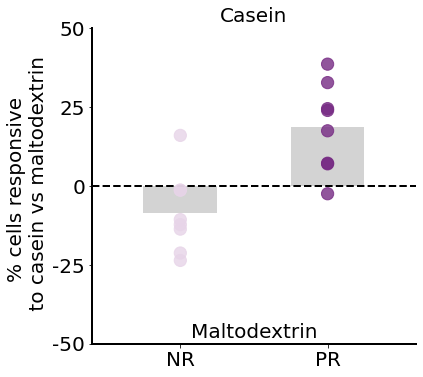

In [50]:

f, ax = plt.subplots(figsize=(6,6),ncols=1, sharey=False)
f.subplots_adjust(wspace=0.5,hspace=0.2, bottom=0.15, left=0.2, right=0.95)
x1=[1,2]

pref_NR
for row in zip(pref_NR,pref_PR):
    y1=row
#     ax[1].plot(x1,y1, color='grey')
    ax.scatter(x1,y1, s=150, color=["#e7d4e8", "#762a83"], zorder=20, alpha=0.8)
    

    
ax.bar(x1, [np.mean(pref_NR),np.mean(pref_PR)], width=0.5, zorder=-1, color="lightgrey")
    
ax.set_ylabel("% cells responsive \n to casein vs maltodextrin", size =20)
ax.set_yticks([-50,-25,0,25,50])
ax.set_yticklabels(['-50','-25','0','25','50'], size=20)


ax.set_xticks([1,2])
ax.set_xticklabels(["NR", 'PR'], size=20)
ax.set_xlim([0.4,2.6])

ax.axhline(0, color="k", linestyle="--", zorder=-1,lw=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


ax.text(1.5, 52, "Casein", horizontalalignment='center',color='black', size=20)
ax.text(1.5, -48, "Maltodextrin",horizontalalignment='center',color='black', size=20)


f.savefig('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\Presentations\\NordicNeuroscience 2024\\Figs\\cells_cond1.pdf')

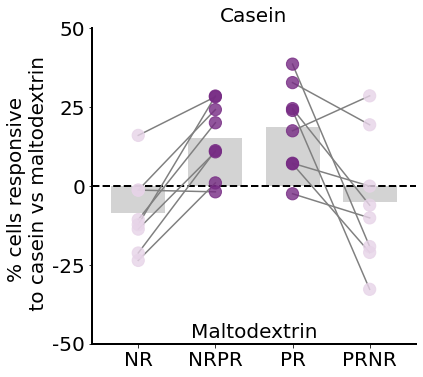

In [49]:
f, ax = plt.subplots(figsize=(6,6),ncols=1, sharey=False)
f.subplots_adjust(wspace=0.5,hspace=0.2, bottom=0.15, left=0.2, right=0.95)


x1=[1,2]
x2=[3,4]

for row in zip(pref_NR,pref_NRPR):
    y1=row
    ax.plot(x1,y1, color='grey')
    ax.scatter(x1,y1, s=150, color=["#e7d4e8", "#762a83"], zorder=20, alpha=0.8)
    
for row in zip(pref_PR,pref_PRNR):
    y2=row
    ax.plot(x2,y2, color='grey')
    ax.scatter(x2,y2, s=150, color=["#762a83", "#e7d4e8"], zorder=20, alpha=0.8)
    

    
ax.bar(x1, [np.mean(pref_NR),np.mean(pref_NRPR)], width=0.7, zorder=-1, color="lightgrey")
ax.bar(x2, [np.mean(pref_PR),np.mean(pref_PRNR)], width=0.7, zorder=-1, color="lightgrey")
    
ax.set_ylabel("% cells responsive \n to casein vs maltodextrin", size =20)
ax.set_yticks([-50,-25,0,25,50])
ax.set_yticklabels(['-50','-25','0','25','50'], size=20)


ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["NR", 'NRPR','PR','PRNR'], size=20)
ax.set_xlim([0.4,4.6])

ax.axhline(0, color="k", linestyle="--", zorder=-1,lw=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


ax.text(2.5, 52, "Casein", horizontalalignment='center',color='black', size=20)
ax.text(2.5, -48, "Maltodextrin",horizontalalignment='center',color='black', size=20)

# f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\preference_trial_scatter.png')
f.savefig('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\Presentations\\NordicNeuroscience 2024\\Figs\\cells_cond2.pdf')

In [97]:
df_diet1 = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
 .drop(columns=["NRPR", "PRNR"])
)



AttributeError: 'DataFrame' object has no attribute 'PRNR'

NameError: name 'df_diet1' is not defined

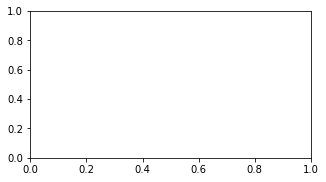

In [333]:
my_colors = {'NR': '#525252', 'PR': '#2171b5'}

'','','',''
f, ax = plt.subplots(figsize=(6,3),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})

sns.boxplot(data=df_diet1,orient="h", ax=ax, palette=my_colors)


ax.set_ylabel("")
ax.set_yticklabels(["NR", "PR"])
ax.set_xticks([-30, 0, 20, 30])
ax.set_xlabel("Lick-activated cells (casein - maltodextrin)")

ax.axvline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [334]:
df_boxplot = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
#  .drop(columns=["NRPR", "PRNR"])
)





KeyError: 'pref'

NameError: name 'df_boxplot' is not defined

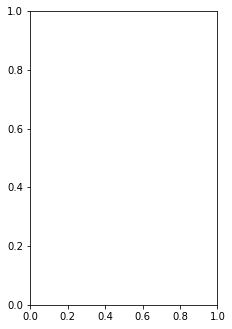

In [335]:
my_colors = {'NR': '#525252', 'NRPR': '#969696', 'PR': '#2171b5','PRNR':'#6baed6'}

'','','',''
f, ax = plt.subplots(figsize=(4,6),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})


sns.boxplot(data=df_boxplot,orient="v", ax=ax, palette=my_colors)


ax.set_xlabel("")
ax.set_xticklabels(["NR",'NRPR', "PR", 'PRNR'],size=13)
ax.set_yticks([-30, -15,0, 15, 30])
ax.set_yticklabels(['-30','-15', '0', '15', '30'],size=13)
ax.set_ylabel("Lick-activated cells (casein - maltodextrin)",size=13)

ax.axhline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [ ]:
sns.boxplot?